# 6.7 複数の定常状態、マッシュルーム、島

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import matplotlib.cm as cm

## Gray and Scott model
### 無次元化後のモデル
$$
\begin{align*}
\frac{du}{dt} &= a (1 - u) - u v^2 - b u \\
\frac{dv}{dt} &= a (c - v) - u v^2 + b u - d v
\end{align*} 
$$

### 定常解 $u_s$の満たすべき式
$$
u_s^3 - 2 (1+c) u_s^2 + \Big\lbrace (1+c)^2 + \frac{(a+d)^2}{a} +b \frac{(a+d)^2}{a^2} \Big\rbrace u_s - \frac{(a+d)^2}{a} = 0
$$

In [83]:
def func(u):
    return u**3 - 2*(1+c)*u**2 + ((1+c)**2 + (a+d)**2/a + b*(a+d)**2/(a**2))*u - (a+d)**2/a

def f(u, v):
    return a*(1-u) - u*v**2 - b*u
def g(u, v):
    return a*(c-v) - u*v**2 + b*u - d*v



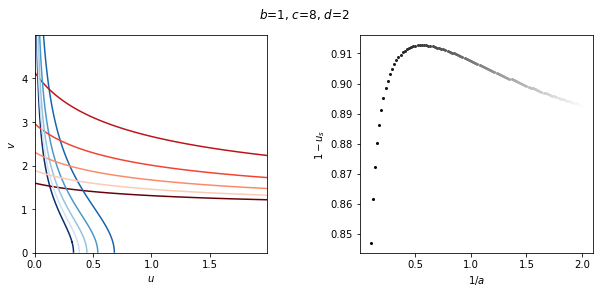

In [124]:
b, c, d = 1, 8, 2
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
plt.subplots_adjust(wspace=0.4, hspace=0.3)

n = 100
pn = np.linspace(0.1, 2, n) # 分岐パラメタの試す値

# ヌルクラインを描画する範囲の指定
xmin, xmax = 0, 2
ymin, ymax = 0, 5
delta = 0.01
X, Y = np.meshgrid(np.arange(xmin, xmax, delta), np.arange(ymin, ymax, delta))

for i, p in enumerate(pn):
    # ヌルクライン
    if i % (n//5) == 0:
        ax = axes.ravel()[0]
        ax.contour(X, Y, f(X, Y), [0], colors=[cm.Blues_r(i/n)])
        ax.contour(X, Y, g(X, Y), [0], colors=[cm.Reds_r(i/n)])
    
    # 分岐図
    ax = axes.ravel()[1]
    a = 1/p
    y = optimize.fsolve(func, 0)
    plt.scatter(p*np.ones(y.shape), 1 - y, color=cm.gray((i/n)), s=4)
    

fig.suptitle(f"$b$={b}, $c$={c}, $d$={d}")
ax = axes.ravel()[0]
ax.set_xlabel("$u$")
ax.set_ylabel("$v$")
ax = axes.ravel()[1]
ax.set_xlabel("$1/a$")
ax.set_ylabel("$1 - u_s$")
plt.show()

## ヨウ素酸塩と亜ヒ酸の反応
### モデル
$$
\begin{align*}
\frac{dX}{dt} &= R + k_0 X_0 - (k_0 + k_3) X \\
\frac{dY}{dt} &= -R + k_0 Y_0 - (k_0 + k_3) Y \\
R &= (k_1^* + k_2^* X) X Y

\end{align*} 
$$

### 定常解 $X_s$の満たすべき式
$$
k_2^*(k_0+k_3)X_s^3 + (k_1^*(k_0+k_3) - k_2^* k_0 (X_0+Y_0))X_s^2
            +((k_0+k_3)^2 - k_1^* k_0 (X_0+Y_0))X_s - k_0 (k_0+k_3)X_0 = 0
$$

In [42]:
def func2(X):
    return (k2a*(k0+k3)*(X**3) + (k1a*(k0+k3) - k2a*k0*(X0+Y0))*(X**2)
            +((k0+k3)**2 - k1a*k0*(X0+Y0))*X - k0*(k0+k3)*X0)

# parameter
k1 = 4.5e3
k2 = 4.5e8
X0 = 8.40e-5
Y0 = 1.01e-3
H = 7.59e-3
k1a = k1*(H**2)
k2a = k2*(H**2)

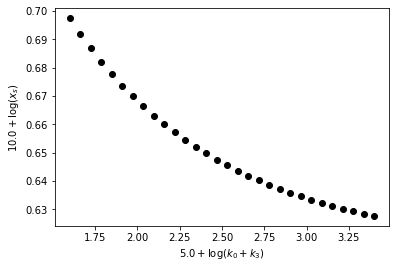

In [51]:
k3 = 0
for p in np.linspace(1.6, 3.4, 30):
    k0 = np.exp(p-5) - k3
    y = optimize.fsolve(func2,0)
    plt.scatter(p*np.ones(y.shape), 10+np.log(y), c="k")
    plt.ylabel("$10.0 + \log(x_s)$")
    plt.xlabel("$5.0 + \log(k_0 + k_3)$")
plt.show()